In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
import data_preparation as dp

In [3]:
# Import the cleaned data
df = dp.full_clean("../data/Aviation_Data.csv","../data/Aviation_Data_Cleaned.csv")
df

/Users/willbennett/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/Users/willbennett/Documents/Flatiron/Course Materials/phase_1/phase1-project/code_package/data_preparation.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_data_cleaned[top_makes_filter]['make'] = aviation_data_cleaned['make'].map(top_makes_map)


,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,number_of_engines,engine_type,...,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,top_make,top_model,passenger_count,city,state,use_category
7,1982-01-01,"PULLMAN, WA",Unknown,BLACKBURN AG STRIP,Non-Fatal,Substantial,Cessna,140,1.0,Reciprocating,...,0.0,2.0,Visual Meteorological Conditions,Takeoff,True,False,2.0,Pullman,WA,Private Enterprise
8,1982-01-01,"EAST HANOVER, NJ",N58,HANOVER,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,...,0.0,2.0,Instrument Meteorological Conditions,Landing,True,False,2.0,East hanover,NJ,Private Enterprise
9,1982-01-01,"JACKSONVILLE, FL",JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,North American,NAVIONL17B,1.0,Reciprocating,...,3.0,0.0,Instrument Meteorological Conditions,Cruise,False,False,3.0,Jacksonville,FL,Unknown
10,1982-01-01,"HOBBS, NM",Unknown,Unknown,Non-Fatal,Substantial,Piper,PA28,1.0,Reciprocating,...,0.0,1.0,Visual Meteorological Conditions,Approach,True,True,1.0,Hobbs,NM,Private Enterprise
11,1982-01-01,"TUSKEGEE, AL",Unknown,TUSKEGEE,Non-Fatal,Substantial,Beech,V35B,1.0,Reciprocating,...,0.0,1.0,Visual Meteorological Conditions,Landing,True,False,1.0,Tuskegee,AL,Private Enterprise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90340,2022-12-21,"Auburn Hills, MI",Unknown,Unknown,Minor,Unknown,Cessna,172,1.0,Unknown,...,0.0,0.0,Unknown Meteorological Conditions,Unknown,True,True,1.0,Auburn hills,MI,Private Enterprise
90341,2022-12-21,"Reserve, LA",Unknown,Unknown,Minor,Unknown,Grumman American Avn. Corp.,AA5B,1.0,Reciprocating,...,0.0,1.0,Unknown Meteorological Conditions,Unknown,False,True,2.0,Reserve,LA,Unknown
90343,2022-12-26,"Annapolis, MD",Unknown,Unknown,Minor,Unknown,Piper,PA28,1.0,Unknown,...,0.0,0.0,Unknown Meteorological Conditions,Unknown,True,True,1.0,Annapolis,MD,Private Enterprise
90345,2022-12-26,"Payson, AZ",PAN,PAYSON,Non-Fatal,Substantial,American Champion Aircraft,8GCBC,1.0,Reciprocating,...,0.0,1.0,Visual Meteorological Conditions,Unknown,False,False,1.0,Payson,AZ,Unknown


**Observations**
- The data is mostly clean with nice column names
- Key columns are make and model
- Each column represents a particular Accident

In [4]:
# Let's check out the information about this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70422 entries, 7 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              70422 non-null  datetime64[ns]
 1   location                70422 non-null  object        
 2   airport_code            70422 non-null  object        
 3   airport_name            70422 non-null  object        
 4   injury_severity         70422 non-null  object        
 5   aircraft_damage         70422 non-null  object        
 6   make                    70422 non-null  object        
 7   model                   70422 non-null  object        
 8   number_of_engines       70422 non-null  float64       
 9   engine_type             70422 non-null  object        
 10  purpose_of_flight       70422 non-null  object        
 11  total_fatal_injuries    70422 non-null  float64       
 12  total_serious_injuries  70422 non-null  float6

**Observations**
- We have a single datetime column
- We have a significant number of float columns
- We have a significant number of object columns
- We have mostly non-nulls

In [5]:
# Check for nulls
df.isna().sum()

event_date                0
location                  0
airport_code              0
airport_name              0
injury_severity           0
aircraft_damage           0
make                      0
model                     0
number_of_engines         0
engine_type               0
purpose_of_flight         0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
weather_condition         0
broad_phase_of_flight     0
top_make                  0
top_model                 0
passenger_count           0
city                      0
state                     0
use_category              0
dtype: int64

In [6]:
# Let's investigate the numerical side
df.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,passenger_count
count,70422.000000,70422.000000,70422.000000,70422.000000,70422.000000,70422.000000
mean,1.112167,0.373591,0.224064,0.294610,2.764307,3.656570
std,0.408564,2.414545,1.076737,1.245903,16.498643,17.055426
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000,699.000000


**Obesrvations**
- `number_of_engines` are mostly 1 (25 -> 75%)
- `total_fatal_injuries` are mostly 0 (25 -> 75%)
- `total_serious_injuries` are mostly 0 (25 -> 75%)
- `total_minor_injuries` are mostly 0 (25 -> 75%)
- `total_uninjured` is fairly left skewed
- `passenger_count` is fairly left skewed
- `fatality_rate` are mostly 0 (25 -> 75%)

In [7]:
# Let's investigate the non-numerical data
df.describe(include=object)

,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,engine_type,purpose_of_flight,weather_condition,broad_phase_of_flight,city,state,use_category
count,70422,70422,70422,70422,70422,70422,70422,70422,70422,70422,70422,70422,70422,70422
unique,21271,9030,21586,5,4,1683,4257,12,26,3,12,12140,61,3
top,"ANCHORAGE, AK",Unknown,Unknown,Non-Fatal,Substantial,Cessna,172,Reciprocating,Personal,Visual Meteorological Conditions,Unknown,Anchorage,CA,Private Enterprise
freq,385,28693,26506,57646,54807,25161,6196,60242,40354,64131,17998,482,7535,43964


**Observations**
- `event_id` is unique for every row
- There are a significant number of categorical data with few unique counts
 - `injury_severity`
 - `aircraft_damage`
 - `engine_type`
 - `purpose_of_flight`
 - `weather_condition`
 - `broad_phase_of_flight`
 - `state`
- There are a few columns with many different values:
 - `location`
 - `airport_code`
 - `airport_name`
 - `make`
 - `model`
 - `city`

## Key Column quick dive

In [8]:
# Let's dive into our key columns
df[df['top_make'] & df['top_model']].groupby(['make','model'])['event_date'].count().sort_values(ascending=False)[:10]

make     model
Cessna   172      6192
Piper    PA28     4605
Cessna   150      3040
         182      2534
Piper    PA18     1625
         PA32     1397
Grumman  G164      761
Beech    A36       446
         C23       220
         58        202
Name: event_date, dtype: int64

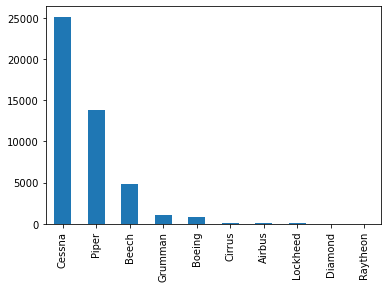

In [9]:
# Plot the top makes
df[df['top_make']]['make'].value_counts().plot.bar();

**Observations**
- The top 4 makes account for the majority of the accidents
- This may be simply because they are the most popular small aircraft

Need to clean case redundancies

In [10]:
# Plot the top models
df[df['top_model']]['model'].value_counts()

172               6196
PA28              4612
150               3044
182               2536
PA18              1641
PA32              1402
G164              1166
A36                477
AS35               369
SR22               272
C23                221
58                 211
A75N               174
AA5B               162
AA5A               125
DA20                99
SR20                86
B75N1               59
DA40                48
E75                 47
A320                34
A321                15
L101                14
DA42                12
HAWKER               9
STANDARDCIRRUS       8
L382                 6
PV2                  5
Name: model, dtype: int64

**Observations**
- Incidents seem to be fairly spread out over the top 10 models
- 152 & 172 do seem to dominate

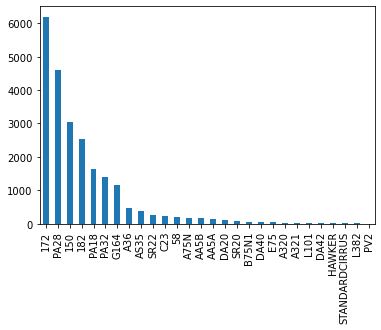

In [11]:
# Let's combine make and model
df[df['top_model']]['model'].value_counts().plot.bar();

**Observations**
- Cessna & Piper make up all the top 10

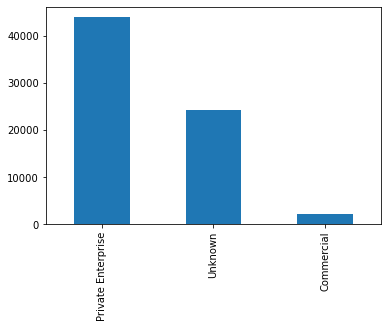

In [12]:
# purpose_of_flight
df['use_category'].value_counts().plot.bar();

## Categorical Data Quick Dive

In [13]:
# Let's investigate a column with few unique values
df['aircraft_damage'].value_counts()

Substantial    54807
Destroyed      14065
Unknown         1053
Minor            497
Name: aircraft_damage, dtype: int64

In [14]:
# Check out the end result for injuries
df['injury_severity'].value_counts().head()

Non-Fatal      57646
Fatal          12454
Minor            178
Serious          130
Unavailable       14
Name: injury_severity, dtype: int64

In [15]:
# Create a column call fatality rate to figure out the deadliness of the accident
df['fatality_rate'] = df['total_fatal_injuries']/df['passenger_count']

In [16]:
df['fatality_rate'].head()

7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
Name: fatality_rate, dtype: float64

## Creating Filters
- top_makes_filter: filter of top 5 private & 5 public makes
- top_models_filter: filter of top 3 models in each make

In [17]:
top_models_filter = df['top_model']
top_makes_filter = df['top_make']

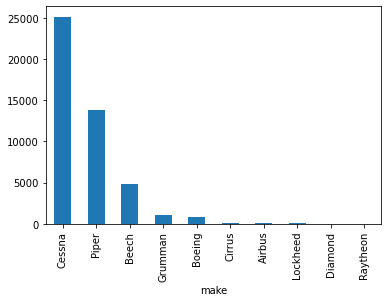

In [18]:
df[top_makes_filter].groupby('make')['event_date'].count().sort_values(ascending=False).plot.bar();

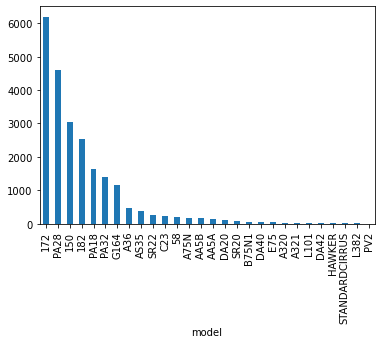

In [19]:
df[top_models_filter].groupby('model')['event_date'].count().sort_values(ascending=False).plot.bar();

In [20]:
df[top_makes_filter].groupby('make')['fatality_rate'].mean().sort_values(ascending=False)

make
Lockheed    0.374111
Raytheon    0.254902
Beech       0.246068
Cirrus      0.213158
Piper       0.170975
Cessna      0.128540
Grumman     0.084541
Diamond     0.071429
Airbus      0.042254
Boeing      0.042136
Name: fatality_rate, dtype: float64

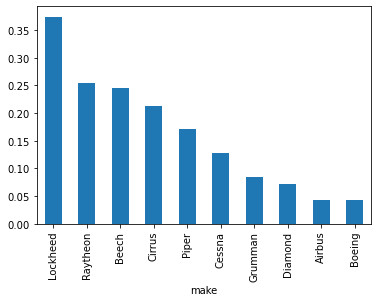

In [21]:
# Check out fatalit rate for top makes
df[top_makes_filter].groupby('make')['fatality_rate'].mean().sort_values(ascending=False).plot.bar();

In [22]:
# Check to see if there are any obvious correlations
df.corr()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,top_make,top_model,passenger_count,fatality_rate
number_of_engines,1.000000,0.104074,0.051780,0.088122,0.293852,0.113265,-0.164025,0.308699,0.085177
total_fatal_injuries,0.104074,1.000000,0.127397,0.079563,-0.019417,0.003800,-0.015332,0.136642,0.334554
total_serious_injuries,0.051780,0.127397,1.000000,0.334849,0.070103,-0.020961,-0.013116,0.173442,-0.052349
total_minor_injuries,0.088122,0.079563,0.334849,1.000000,0.174100,-0.020478,-0.010560,0.273870,-0.084982
total_uninjured,0.293852,-0.019417,0.070103,0.174100,1.000000,0.006211,-0.049696,0.981749,-0.070540
top_make,0.113265,0.003800,-0.020961,-0.020478,0.006211,1.000000,0.411991,0.003727,0.003931
top_model,-0.164025,-0.015332,-0.013116,-0.010560,-0.049696,0.411991,1.000000,-0.051843,-0.023811
passenger_count,0.308699,0.136642,0.173442,0.273870,0.981749,0.003727,-0.051843,1.000000,-0.030387
fatality_rate,0.085177,0.334554,-0.052349,-0.084982,-0.070540,0.003931,-0.023811,-0.030387,1.000000


**Observations**
- There's no strong correlation with the number of fatal_injuries

## Investigating Fatality Rates

In [44]:
df[top_makes_filter & (df['use_category'] == 'Private Enterprise')]['make'].value_counts().reset_index()

,index,make
0,Cessna,25161
1,Piper,13832
2,Beech,4840
3,Cirrus,96
4,Diamond,35


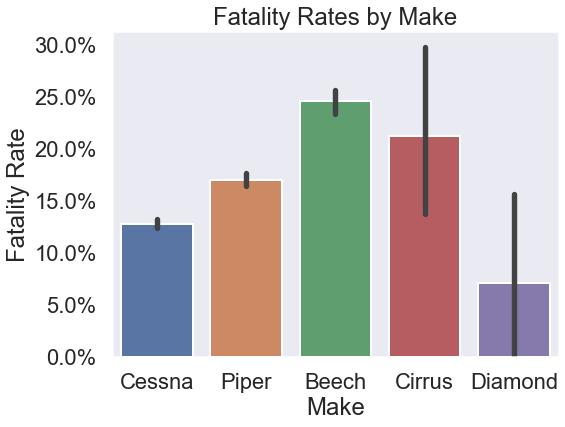

In [43]:
# Separate out the plot by make
fig, ax = plt.subplots(figsize=(8, 6))
data = df[top_makes_filter & (df['use_category'] == 'Private Enterprise')]
sns.barplot(data=data, 
            x='make', 
            y='fatality_rate',
            ax=ax,
           )
sns.set_style("dark")
ax.set_title('Fatality Rates by Make')
ax.set_ylabel('Fatality Rate')
ax.set_xlabel('Make')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))
fig.savefig("../images/private_fatality_rates_by_make.png");

In [25]:
df[top_makes_filter & (df['use_category'] == 'Commercial')]['make'].value_counts().reset_index()

,index,make
0,Grumman,1112
1,Boeing,875
2,Airbus,71
3,Lockheed,67
4,Raytheon,17


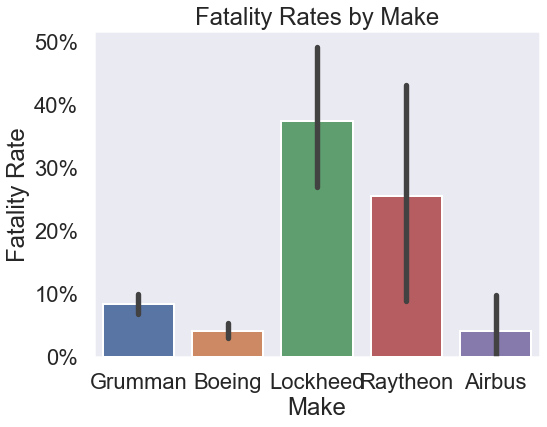

In [42]:
# Separate out the plot by make
fig, ax = plt.subplots(figsize=(8, 6))
data = df[top_makes_filter & (df['use_category'] == 'Commercial')]
sns.barplot(data=data, 
            x='make', 
            y='fatality_rate',
            ax=ax,
           )
sns.set_style("dark")
ax.set_title('Fatality Rates by Make')
ax.set_ylabel('Fatality Rate')
ax.set_xlabel('Make')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0, decimals=None))
fig.savefig("../images/commercial_fatality_rates_by_make.png");

**Observations**
- Beech seems to have the highest fatality rate

In [27]:
# Create a new column for year
df['event_year'] = df['event_date'].dt.year

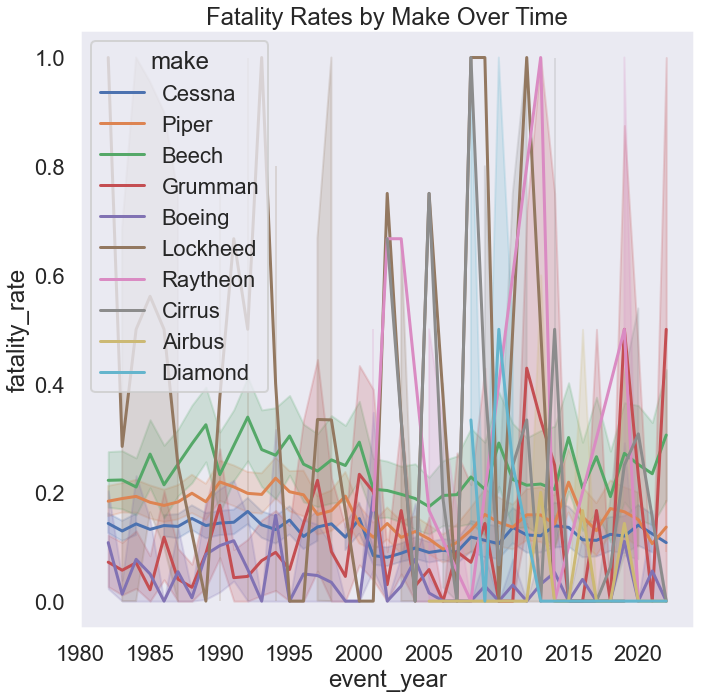

In [41]:
# Let's investigate that over time
fig, ax = plt.subplots(figsize=(11, 11))
sns.lineplot(data=df[top_makes_filter], 
             
             x='event_year', 
             y='fatality_rate',
             ax=ax,
             hue='make',
           )
ax.set_title('Fatality Rates by Make Over Time');

**Observations**
- While this looks messy, it's clear that Beech has maintained a higher fatality rate than the other makes

## Investigating Time

Text(0.5, 0, 'Year')

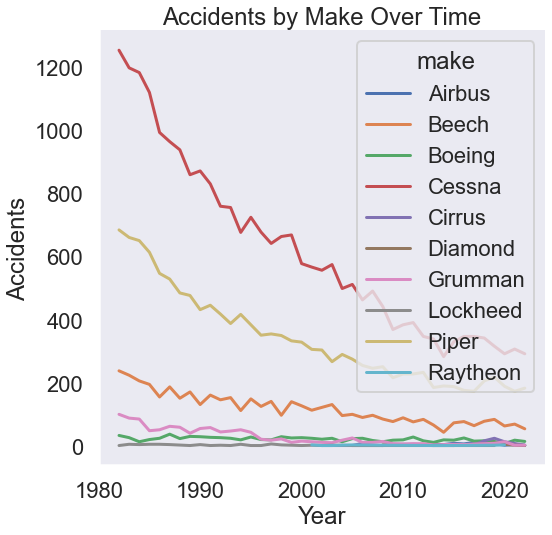

In [40]:
# Accidents over time
data = df[top_makes_filter].groupby(['make', 'event_year']).count().reset_index()

fig, ax = plt.subplots(figsize=(8, 8))
sns.lineplot(data=data, 
             x='event_year', 
             y='event_date',
             ax=ax,
             hue='make',
           )
sns.despine()
sns.set_style("dark")
ax.set_title('Accidents by Make Over Time')
ax.set_ylabel('Accidents')
ax.set_xlabel('Year')
#fig.savefig("../images/accidents_by_make_over_time.png");

### Make & Model Combinations
Let's investigate the top Makes & Models so we can recommend what makes the company may want to avoid

In [30]:
# First let's pull the data
data = df[top_makes_filter & top_models_filter].groupby(['make','model'])['event_date'].count().reset_index()
data

,make,model,event_date
0,Airbus,A320,12
1,Airbus,A321,15
2,Airbus,AS35,14
3,Beech,58,202
4,Beech,A36,446
5,Beech,C23,220
6,Beech,HAWKER,1
7,Boeing,A75N,151
8,Boeing,B75N1,48
9,Boeing,E75,36


In [31]:
pivot_table_make_model = pd.pivot_table(df[top_makes_filter & top_models_filter], 
                                        values='passenger_count', 
                                        index='model', 
                                        columns='make', 
                                        aggfunc='count')

In [32]:
pivot_data = pivot_table_make_model.sort_values(by=list(pivot_table_make_model.columns), ascending=False)
pivot_data

make,Airbus,Beech,Boeing,Cessna,Cirrus,Diamond,Grumman,Lockheed,Piper,Raytheon
model,,,,,,,,,,
A321,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AS35,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A320,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A36,NaN,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
C23,NaN,220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
HAWKER,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
A75N,NaN,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B75N1,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


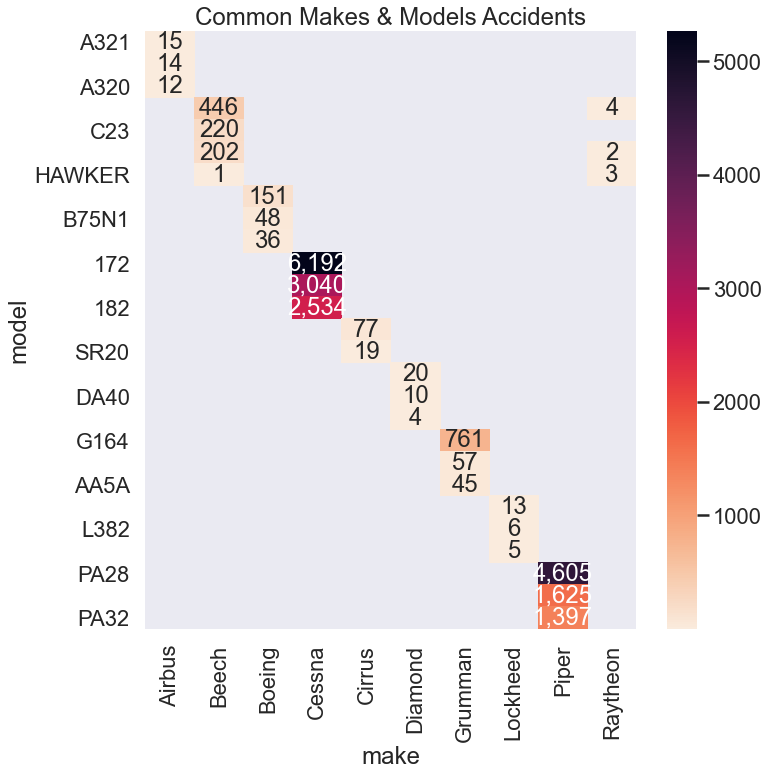

In [39]:
# Draw the heatmap with the mask and correct aspect ratio
fig, ax = plt.subplots(figsize=(11, 11))
sns.set_theme(style="dark")
sns.set_context("poster")
cmap = sns.color_palette("rocket_r", as_cmap=True)
hue = data['event_date'].tolist().sort()
sns.heatmap(pivot_data, 
            cmap=cmap, 
            robust=True,
            annot=True,
            fmt=",g",
            ax=ax
           )

ax.set_title('Common Makes & Models Accidents')
fig.savefig("../images/common_makes_models_avoid.png");


## Number of engines
The number of engines is a key indicator of the type of plane we have. We can use that to identify the types of planes that are most often in accidents

In [34]:
df[top_makes_filter].groupby('number_of_engines').count().reset_index()

,number_of_engines,event_date,location,airport_code,airport_name,injury_severity,aircraft_damage,make,model,engine_type,...,weather_condition,broad_phase_of_flight,top_make,top_model,passenger_count,city,state,use_category,fatality_rate,event_year
0,0.0,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1,1.0,39630,39630,39630,39630,39630,39630,39630,39630,39630,...,39630,39630,39630,39630,39630,39630,39630,39630,39626,39630
2,2.0,6261,6261,6261,6261,6261,6261,6261,6261,6261,...,6261,6261,6261,6261,6261,6261,6261,6261,6259,6261
3,3.0,93,93,93,93,93,93,93,93,93,...,93,93,93,93,93,93,93,93,93,93
4,4.0,99,99,99,99,99,99,99,99,99,...,99,99,99,99,99,99,99,99,99,99


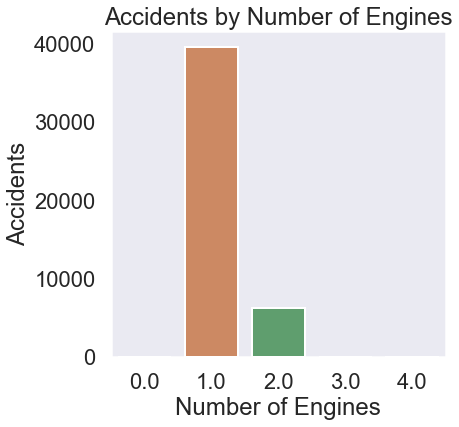

In [38]:
# Separate out the plot by number of engines
fig, ax = plt.subplots(figsize=(6, 6))
data = df[top_makes_filter].groupby('number_of_engines').count().reset_index()
sns.barplot(data=data, 
            x='number_of_engines', 
            y='event_date',
            ax=ax,
           )

ax.set_title('Accidents by Number of Engines')
ax.set_ylabel('Accidents')
ax.set_xlabel('Number of Engines');
#fig.savefig("../images/accidents_by_engine_number.png");

**Observations**
- Most planes are 1 engine, 2 is far behind
- The chart doesn't look very informative since 0 and 4 are non-existent

## Broad Phase of Flight
We will investigate where the accidents happen so we know what to be ready for

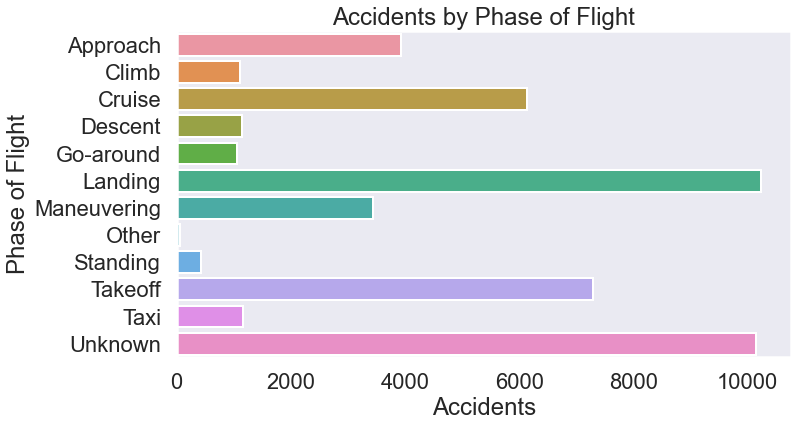

In [37]:
# Separate out the plot by phase of flight
fig, ax = plt.subplots(figsize=(11, 6))
data = df[top_makes_filter].groupby('broad_phase_of_flight').count().reset_index()
sns.barplot(data=data, 
            x='event_date', 
            y='broad_phase_of_flight',
            ax=ax,
           )
sns.set_style("dark")
ax.set_title('Accidents by Phase of Flight')
ax.set_xlabel('Accidents')
ax.set_ylabel('Phase of Flight');
fig.savefig("../images/accidents_by_flight_phase.png");

**Observations**
- The majorty happen in landing
- This can be useful to be aware of when accidents happen

# Conclusion
Note: We only have incident data, we don't have the number of flights for airplanes. This makes it challenging to answer questions such as:
- What is the most accident-prone airplane?
- How have accident rates changed over time?
- Which locations have the fewest accidents?

We can also not answer direct questions about airplane popularity that would be useful when entering a new market such as:
- What is the most popular aircraft make and model?
- Where is the most popular location to fly aircraft?

That being said, we are able to make some conclusions including:
- Some makes have a higher rate of fatal accidents
- The most common phase of flight is landing
- Most planes involved in accidents have 1 or 2 wings
- The top 4 makes involved in accidents are Beech, Bell, Cessna, and Piper
- There are certain models that seem to be very involved in accidents and may want to be avioded